In [1]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sb
import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel('./data/time_speed.xlsx')
df.head()

,time,speed
0,1.0,60.662926
1,1.5,32.280792
2,2.0,57.397340
3,2.5,43.504416
4,3.0,14.868792


### What curve is this? 

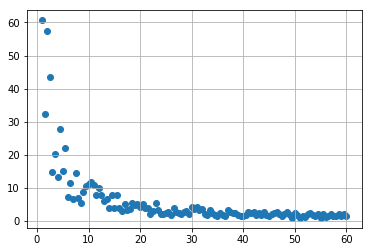

In [3]:
plt.scatter(df['time'], df['speed'])
plt.grid()

In [74]:
X_train, X_test, y_train, y_test = train_test_split(df['time'], df["speed"], test_size=0.25, random_state=5)
quad_predictor = PolynomialFeatures(degree=4)
quad_predictor

PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)

In [75]:
# generate all possible combinations of quadratic equations with fit_transform
X_train_quadratic = quad_predictor.fit_transform(X_train.values.reshape(-1, 1))
X_test_quadratic = quad_predictor.transform(X_test.values.reshape(-1, 1))

In [76]:
regressor_quadratic = LinearRegression()
regressor_quadratic

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [77]:
obtained_model = regressor_quadratic.fit(X_train_quadratic, y_train)
obtained_model
# regressor_quadratic is obtained_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [78]:
X_test_quadratic = quad_predictor.transform(X_test.values.reshape(-1, 1))
obtained_y_test = obtained_model.predict(X_test_quadratic)

In [79]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_true = y_test, y_pred = obtained_y_test)
print("MSE = %f" % mse)

MSE = 15.038386


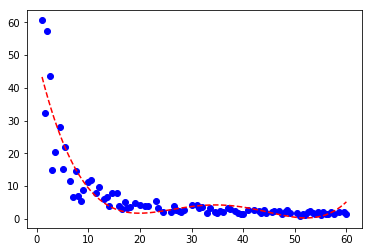

In [80]:
# plt.plot(X_test, obtained_y_test, marker='o', linestyle='None', color='r')
import numpy as np
plt.plot(X_train, y_train, marker='o', linestyle='None', color='b')
xx = np.linspace(df['time'].min(), df['time'].max(), 100)
xx_quadratic = quad_predictor.fit_transform(xx.reshape(-1, 1))

plt.plot(xx, obtained_model.predict(xx_quadratic), linestyle='--', color='r')